In [1]:
RESULTS_ZIP_FILE = "../../results/rico/rico.zip"
RESULTS_FOLDER_DESTINATION = "../../results/rico/"

In [2]:
import zipfile

with zipfile.ZipFile(RESULTS_ZIP_FILE, 'r') as zip_ref:
    zip_ref.extractall(RESULTS_FOLDER_DESTINATION)


In [1]:
RESULTS_FOLDER = "../../results/rico/rico"

In [4]:
import os

list_all_files = os.listdir(RESULTS_FOLDER)
len(list_all_files)

250

In [43]:
# NOTE: this was run from command line to use multiprocessing
#%run ../../utils/calculate_metrics --folder ../../results/rico/rico --rico

In [2]:
import pandas as pd
import os
import json

# Load all json files into a list of dataframes
all_json_files = [RESULTS_FOLDER + "/" + file for file in os.listdir(RESULTS_FOLDER) if file.endswith(".json")]

dataframes = []

for file_path in all_json_files:
    with open(file_path, 'r') as f:
        data = json.load(f)
    dataframes.append(pd.DataFrame([data]))  # Convert dictionary to a single-row DataFrame

# Combine all dataframes into one
df = pd.concat(dataframes, ignore_index=True)


In [3]:
df.rename(columns={
    'len_pred': 'prediction_length',
    'len_answer': 'answer_length',
    'max_len': 'max_length',
    'bleu': 'BLEU_score',
    'ed': 'edit_distance',
    'n_ed': 'normalized_edit_distance',
}, inplace=True)


In [4]:
pd.set_option('display.float_format', '{:.3f}'.format)

In [5]:
df.describe()

,prediction_length,answer_length,max_length,BLEU_score,edit_distance,normalized_edit_distance
count,125.000,125.000,125.000,125.000,125.000,125.000
mean,12641.560,1215.488,12727.096,0.229,11776.904,0.770
std,8454.985,1145.624,8344.518,0.293,8333.062,0.272
min,191.000,149.000,225.000,0.000,0.000,0.000
25%,2169.000,492.000,2280.000,0.022,1084.000,0.486
50%,17073.000,869.000,17073.000,0.051,16187.000,0.930
75%,19432.000,1631.000,19432.000,0.476,18249.000,0.972
max,21810.000,7938.000,21810.000,1.000,21646.000,0.993


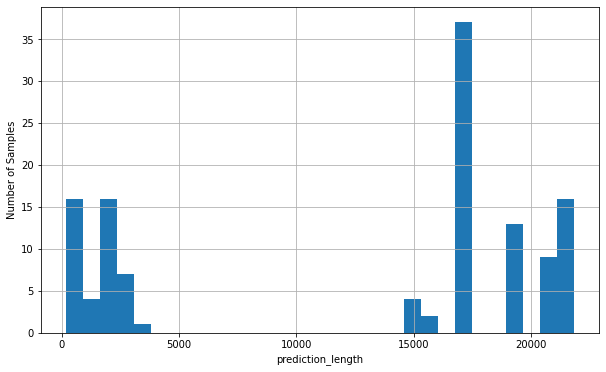

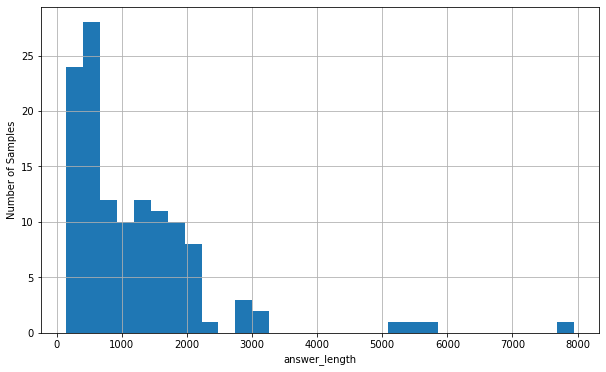

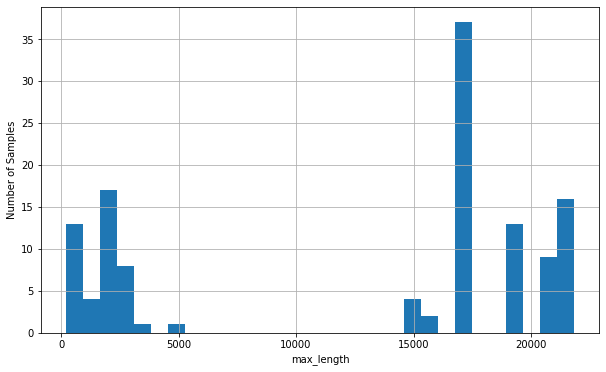

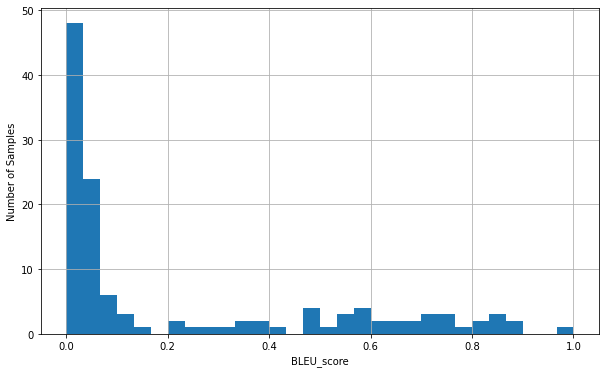

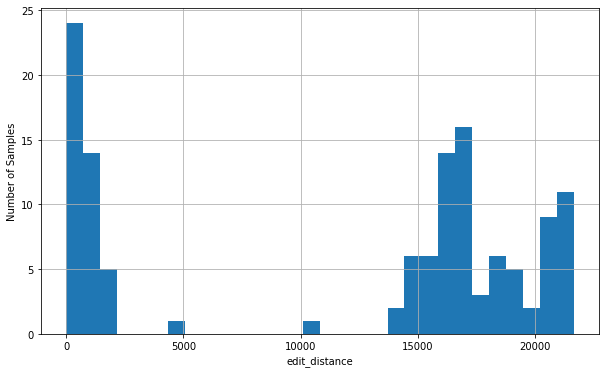

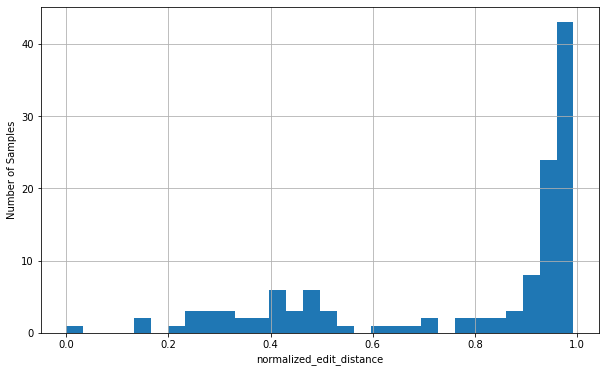

In [9]:
import matplotlib.pyplot as plt

metrics = ["prediction_length", "answer_length", "max_length", "BLEU_score", "edit_distance", "normalized_edit_distance"]

for metric in metrics:
    plt.figure(figsize=(10,6))
    plt.hist(df[metric], bins=30)
    #plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Number of Samples')
    plt.grid(True)
    plt.show()


In [14]:
!pip3 install seaborn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 1.7 MB/s eta 0:00:00a 0:00:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


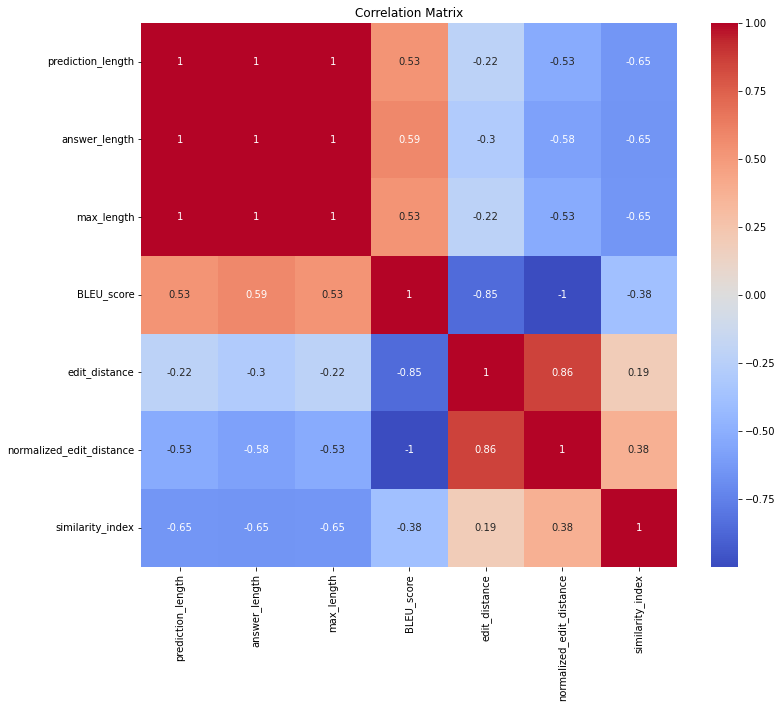

In [15]:
import seaborn as sns
correlation_matrix = df[metrics].corr()
plt.figure(figsize=(12,10))
plt.title("Correlation Matrix")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

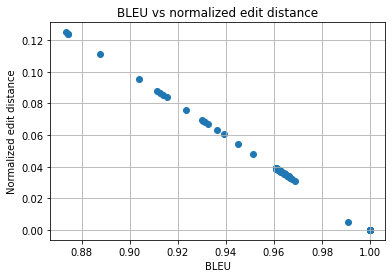

In [16]:
plt.scatter(df["BLEU_score"], df["normalized_edit_distance"])
plt.title("BLEU vs normalized edit distance")
plt.xlabel("BLEU")
plt.ylabel("Normalized edit distance")
plt.grid(True)
plt.show()
